In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from nltk.corpus import stopwords as sw
from sklearn.feature_extraction.text import TfidfVectorizer

import re

%matplotlib inline

In [17]:
stopwords = set(sw.words('english'))

In [18]:
def lemmatize(tokens):
    lemmatizer = nltk.stem.WordNetLemmatizer()
    lemma_list = []
    for token in tokens:
        lemma = lemmatizer.lemmatize(token, 'v')
        if lemma == token:
            lemma = lemmatizer.lemmatize(token)
        lemma_list.append(lemma)
    # return [ lemmatizer.lemmatize(token, 'v') for token in tokens ]
    return lemma_list

def process_text(text):
    text = text.lower()
    text = re.sub(r'http\S+', ' <url> ', text)
    text = re.sub(r'#+', ' <hashtag> ', text )
    text = re.sub(r'@[A-Za-z0-9]+', ' <user> ', text)
    text = re.sub(r"([A-Za-z]+)'s", r"\1 is", text)

    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"don't", "do not ", text)
    text = re.sub(r"did't", "did not ", text)
    text = re.sub(r"shouldn't", "should not ", text)
    text = re.sub(r"wouldn't", "would not ", text)
    text = re.sub(r"hadn't", "had not ", text)
    text = re.sub(r"can't", "can not", text)
    text = re.sub(r"won't", "will not ", text)
    text = re.sub(r"isn't", "is not ", text)
    text = re.sub(r"can't", "can not ", text)
    text = re.sub(r"n't", " not ", text)

    text = re.sub(r"dont", " do not", text)
    text = re.sub(r"didnt", " did not", text)
    text = re.sub(r"wont", " will not", text)
    text = re.sub(r"cant", " can not", text)

    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\d+', ' <number> ', text)
    text = re.sub('\s+url\s+', ' <url> ', text)
    text = re.sub(r'\s+', ' ', text)
    text = text.strip()
    return text

def remove_stopwords(stopwords, text):
    res = []
    for token in tokens:
        if not token in stopwords:
            res.append(token)
    return ' '.join(text)

In [2]:
data = pd.read_json('data/nepali-movies.json')

In [7]:
data.head()

,genre,imdb_url,plot,rating,runtime,title,votes,year
0,"Drama, Romance",https://www.imdb.com/title/tt6944688/?ref_=adv...,"A Man stalks a girl, after while they fall in ...",8.2,138 min,A Mero Hajur 2,164.0,2017
1,"Comedy, Drama",https://www.imdb.com/title/tt7229666/?ref_=adv...,Chhakka Panja 2 continues with new story of Ra...,6.8,138 min,Chhakka Panja 2,190.0,2017
2,Comedy,https://www.imdb.com/title/tt8393764/?ref_=adv...,When she learns about the worst condition of t...,6.2,None,Chhakka Panja 3,52.0,2018
3,"Comedy, Drama",https://www.imdb.com/title/tt6580708/?ref_=adv...,"Dhanapati,a poor man suffering from high pover...",8.4,None,Dhanapati,46.0,2017
4,"Drama, Romance",https://www.imdb.com/title/tt8475990/?ref_=adv...,An romantic relationship between a celebrity a...,NaN,None,A Mero Hajur 3,NaN,2019


In [21]:
data['plot_clean'] = data['plot'].apply(process_text)

In [22]:
data.head()

,genre,imdb_url,plot,rating,runtime,title,votes,year,plot_clean
0,"Drama, Romance",https://www.imdb.com/title/tt6944688/?ref_=adv...,"A Man stalks a girl, after while they fall in ...",8.2,138 min,A Mero Hajur 2,164.0,2017,a man stalks a girl after while they fall in l...
1,"Comedy, Drama",https://www.imdb.com/title/tt7229666/?ref_=adv...,Chhakka Panja 2 continues with new story of Ra...,6.8,138 min,Chhakka Panja 2,190.0,2017,chhakka panja <number> continues with new stor...
2,Comedy,https://www.imdb.com/title/tt8393764/?ref_=adv...,When she learns about the worst condition of t...,6.2,None,Chhakka Panja 3,52.0,2018,when she learns about the worst condition of t...
3,"Comedy, Drama",https://www.imdb.com/title/tt6580708/?ref_=adv...,"Dhanapati,a poor man suffering from high pover...",8.4,None,Dhanapati,46.0,2017,dhanapati a poor man suffering from high pover...
4,"Drama, Romance",https://www.imdb.com/title/tt8475990/?ref_=adv...,An romantic relationship between a celebrity a...,NaN,None,A Mero Hajur 3,NaN,2019,an romantic relationship between a celebrity a...


In [177]:
df = data[pd.notnull(data['rating'])]
df = df[df['plot'] != 'Add a Plot']

In [178]:
df.head()

,genre,imdb_url,plot,rating,runtime,title,votes,year,plot_clean
0,"Drama, Romance",https://www.imdb.com/title/tt6944688/?ref_=adv...,"A Man stalks a girl, after while they fall in ...",8.2,138 min,A Mero Hajur 2,164.0,2017,a man stalks a girl after while they fall in l...
1,"Comedy, Drama",https://www.imdb.com/title/tt7229666/?ref_=adv...,Chhakka Panja 2 continues with new story of Ra...,6.8,138 min,Chhakka Panja 2,190.0,2017,chhakka panja <number> continues with new stor...
2,Comedy,https://www.imdb.com/title/tt8393764/?ref_=adv...,When she learns about the worst condition of t...,6.2,None,Chhakka Panja 3,52.0,2018,when she learns about the worst condition of t...
3,"Comedy, Drama",https://www.imdb.com/title/tt6580708/?ref_=adv...,"Dhanapati,a poor man suffering from high pover...",8.4,None,Dhanapati,46.0,2017,dhanapati a poor man suffering from high pover...
5,"Drama, Romance",https://www.imdb.com/title/tt7085078/?ref_=adv...,"Prem Geet 2, a sequel to 2016's Prem Geet, is ...",8.3,138 min,Prem Geet 2,84.0,2017,prem geet <number> a sequel to <number> s prem...


In [179]:
df.shape

(184, 9)

In [180]:
df['rating'].value_counts()

8.4     11
8.0     10
7.2     10
8.2      9
7.8      8
7.4      8
7.5      7
6.8      7
7.0      7
7.9      6
8.7      6
8.6      6
8.1      6
6.0      5
9.0      5
8.3      5
7.3      4
6.5      4
7.1      4
8.5      4
6.9      4
7.7      4
9.2      4
7.6      4
6.2      3
6.7      3
6.6      3
8.9      3
6.3      3
5.6      2
6.1      2
6.4      2
9.1      2
9.6      2
5.1      1
9.7      1
8.8      1
4.4      1
9.4      1
4.0      1
10.0     1
5.3      1
9.3      1
5.2      1
5.7      1
Name: rating, dtype: int64

In [213]:
#df3 = pd.DataFrame({'value': np.random.randint(1, 80, 20)}) 
df3 = pd.DataFrame({'value' : np.arange(1, 11)})
df3['rating_categorical'] = pd.cut(df3.value,
                     bins=[0, 3, 6, 8, 10],
                     labels=["A", "B", "C", "D",])
df3

,value,rating_categorical
0,1,A
1,2,A
2,3,A
3,4,B
4,5,B
5,6,B
6,7,C
7,8,C
8,9,D
9,10,D


In [224]:
df['rating_categorical'] = pd.cut(df.rating,
                     bins=[0, 3, 6, 8, 10],
                     labels=["0", "1", "2", "3",])

In [225]:
df.head()

,genre,imdb_url,plot,rating,runtime,title,votes,year,plot_clean,rating_categorical
0,"Drama, Romance",https://www.imdb.com/title/tt6944688/?ref_=adv...,"A Man stalks a girl, after while they fall in ...",8.2,138 min,A Mero Hajur 2,164.0,2017,a man stalks a girl after while they fall in l...,3
1,"Comedy, Drama",https://www.imdb.com/title/tt7229666/?ref_=adv...,Chhakka Panja 2 continues with new story of Ra...,6.8,138 min,Chhakka Panja 2,190.0,2017,chhakka panja <number> continues with new stor...,2
2,Comedy,https://www.imdb.com/title/tt8393764/?ref_=adv...,When she learns about the worst condition of t...,6.2,None,Chhakka Panja 3,52.0,2018,when she learns about the worst condition of t...,2
3,"Comedy, Drama",https://www.imdb.com/title/tt6580708/?ref_=adv...,"Dhanapati,a poor man suffering from high pover...",8.4,None,Dhanapati,46.0,2017,dhanapati a poor man suffering from high pover...,3
5,"Drama, Romance",https://www.imdb.com/title/tt7085078/?ref_=adv...,"Prem Geet 2, a sequel to 2016's Prem Geet, is ...",8.3,138 min,Prem Geet 2,84.0,2017,prem geet <number> a sequel to <number> s prem...,3


In [238]:
vectorizer = TfidfVectorizer(stop_words='english')

In [239]:
X = vectorizer.fit_transform(df['plot_clean']).toarray()

In [240]:
X.shape

(184, 1445)

In [241]:
df['rating_categorical'].value_counts()

2    103
3     68
1     13
0      0
Name: rating_categorical, dtype: int64

# Plot Visualization

In [242]:
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.manifold import TSNE

In [331]:
#projector = PCA(n_components=2)
projector = TruncatedSVD(n_components=2)
#projector = TSNE(n_components=2)

In [332]:
X2d = projector.fit_transform(X)

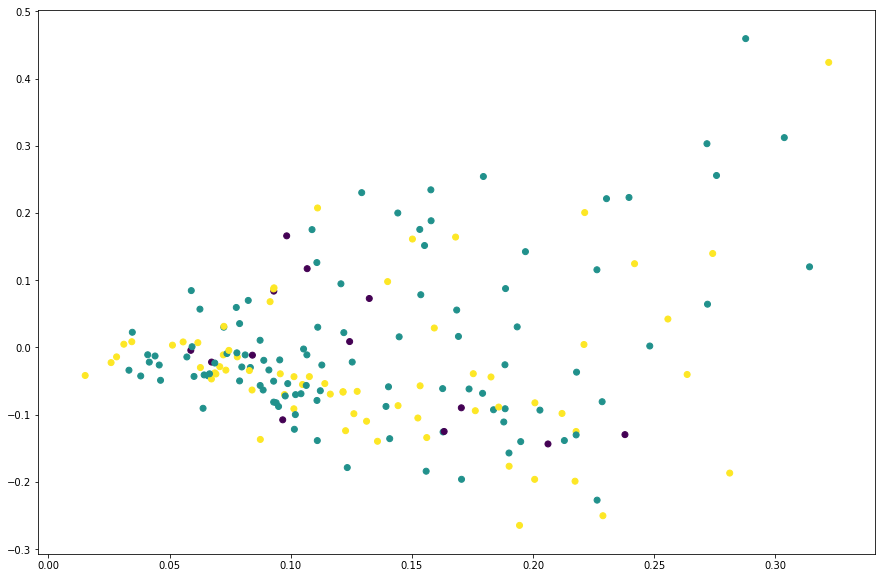

In [333]:
plt.rcParams['figure.figsize'] = (15, 10)
plt.scatter(X2d[:, 0], X2d[:, 1], c=df['rating_categorical'].values)

# Clustering
We cluster plot based on the TF-IDF features extracted from the text.

In [334]:
from sklearn.cluster import KMeans

In [335]:
model = KMeans(n_clusters=3)

In [336]:
predictions = model.fit_predict(X)

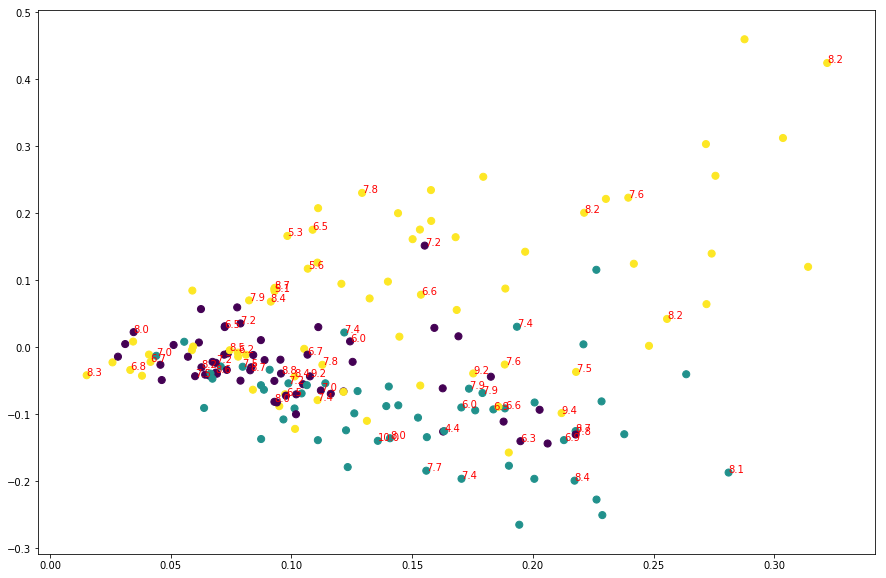

In [337]:
plt.rcParams['figure.figsize'] = (15, 10)
fig, ax = plt.subplots()
ax.scatter(X2d[:, 0], X2d[:, 1], c=predictions, s=50)
for i, txt in enumerate(df['plot'].values):
    #ax.annotate(txt, (X[i],Y[i], Z[i]))
    if i%3 == 0:
        ax.text(X2d[i, 0], X2d[i, 1], "{}".format(df['rating'].iloc[i]), color='red')

#plt.scatter(X2d[:, 0], X2d[:, 1], c=predictions)

In [338]:
#projector = PCA(n_components=1)
projector = TruncatedSVD(n_components=1)
#projector = TSNE(n_components=2)

In [339]:
X1d = projector.fit_transform(X)

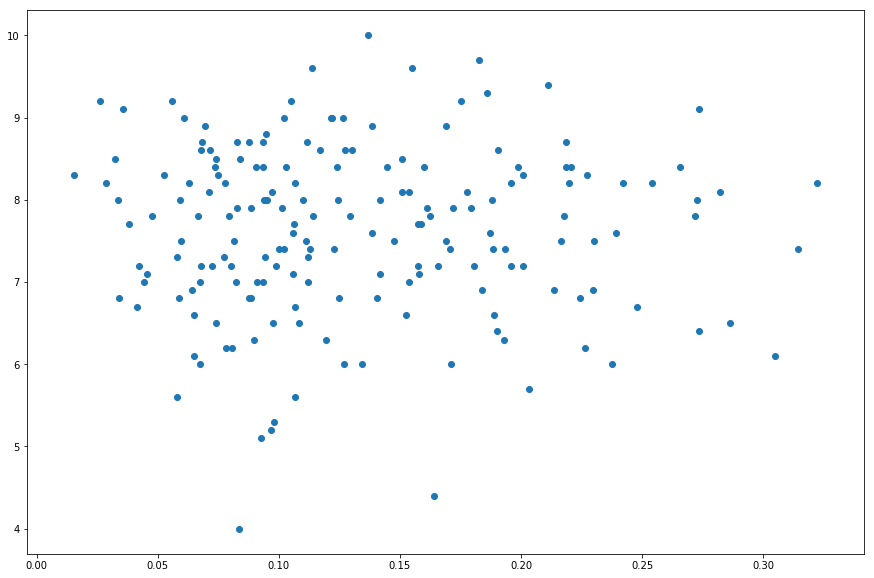

In [340]:
plt.scatter(X1d, df['rating'].values)

# Linear Regression

In [366]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [367]:
model = LinearRegression()

In [368]:
model.fit(X1d, df['rating'].values)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [369]:
model.coef_, model.intercept_

(array([-0.07937315]), 7.635522157528253)

In [370]:
print(mean_squared_error(X1d, model.predict(df['rating'].values.reshape(-1, 1))))
print(mean_absolute_error(X1d, model.predict(df['rating'].values.reshape(-1, 1))))

47.58977258261313
6.897736157846111


In [371]:
# Xreg = np.arange(0, 10)
# Yreg = model.coef_[0] * Xreg + model.intercept_
# plt.scatter(X1d, df['rating'].values)
# plt.plot(Xreg, Yreg, color='red')
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [372]:
#df['rating'].values.reshape(-1, 1)

/home/paradox/anaconda3/envs/machine-learning/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


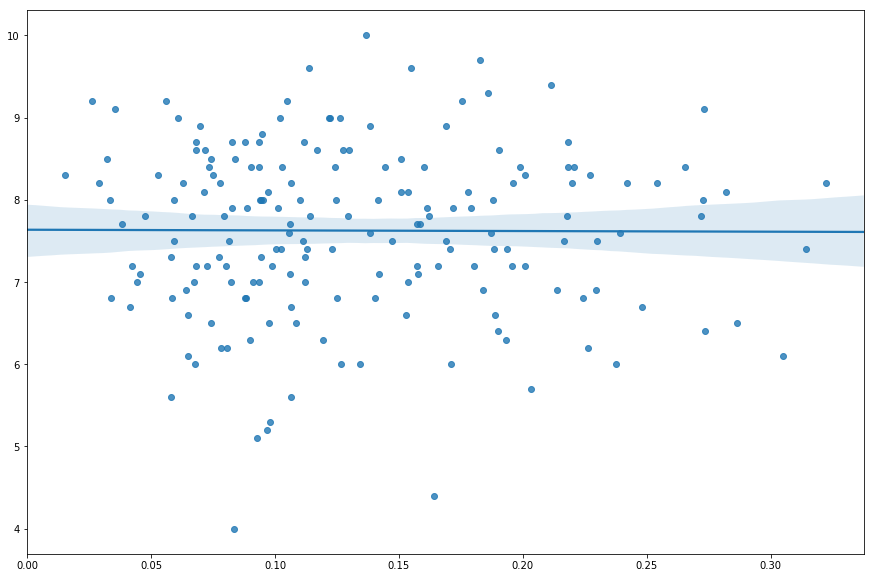

In [374]:
sns.regplot(X1d, df['rating'].values)